In [1]:
import os
import geopandas as gpd

data_path = "./../data"

In [2]:
boundaries_gdf = gpd.read_parquet(os.path.join(data_path, "boundaries.parquet"))
crs = 4326
boundaries_gdf = boundaries_gdf.to_crs(crs)
crs

4326

## Processing geometries

In [3]:
roads_gdf = gpd.read_parquet(os.path.join(data_path, "osm/roads.parquet")).to_crs(crs)
railways_gdf = gpd.read_parquet(os.path.join(data_path, "osm/railways.parquet")).to_crs(crs)
water_gdf = gpd.read_parquet(os.path.join(data_path, "osm/water.parquet")).to_crs(crs)

In [4]:
from blocksnet.blocks.cutting import preprocess_urban_objects

lines_gdf, polygons_gdf = preprocess_urban_objects(roads_gdf, railways_gdf, water_gdf)

2025-04-04 12:15:04.608 | INFO     | blocksnet.blocks.cutting.preprocessing.core:preprocess_urban_objects:36 - Checking roads schema
2025-04-04 12:15:05.074 | WARNING  | blocksnet.utils.validation.gdf_schema:_warn_crs:34 - Current CRS 4326 is not projected. It might cause problems when carrying out spatial operations. Recommended: EPSG:32636
2025-04-04 12:15:05.106 | INFO     | blocksnet.blocks.cutting.preprocessing.core:preprocess_urban_objects:42 - Checking railways schema
2025-04-04 12:15:05.194 | WARNING  | blocksnet.utils.validation.gdf_schema:_warn_crs:34 - Current CRS 4326 is not projected. It might cause problems when carrying out spatial operations. Recommended: EPSG:32636
2025-04-04 12:15:05.202 | INFO     | blocksnet.blocks.cutting.preprocessing.core:preprocess_urban_objects:48 - Checking water schema
2025-04-04 12:15:05.296 | WARNING  | blocksnet.utils.validation.gdf_schema:_warn_crs:34 - Current CRS 4326 is not projected. It might cause problems when carrying out spatial o

## Cut urban blocks

In [6]:
from blocksnet.blocks.cutting import cut_urban_blocks
    
blocks_gdf = cut_urban_blocks(boundaries_gdf, lines_gdf, polygons_gdf)

2025-04-04 12:15:09.017 | INFO     | blocksnet.blocks.cutting.processing.core:wrapper:20 - Checking boundaries schema
2025-04-04 12:15:09.113 | WARNING  | blocksnet.utils.validation.gdf_schema:_warn_crs:34 - Current CRS 4326 is not projected. It might cause problems when carrying out spatial operations. Recommended: EPSG:32636
2025-04-04 12:15:09.119 | INFO     | blocksnet.blocks.cutting.processing.core:wrapper:24 - Checking line objects schema
2025-04-04 12:15:09.325 | WARNING  | blocksnet.utils.validation.gdf_schema:_warn_crs:34 - Current CRS 4326 is not projected. It might cause problems when carrying out spatial operations. Recommended: EPSG:32636
2025-04-04 12:15:09.364 | INFO     | blocksnet.blocks.cutting.processing.core:wrapper:30 - Checking polygon objects schema
2025-04-04 12:15:09.461 | WARNING  | blocksnet.utils.validation.gdf_schema:_warn_crs:34 - Current CRS 4326 is not projected. It might cause problems when carrying out spatial operations. Recommended: EPSG:32635
2025-0

<Axes: >

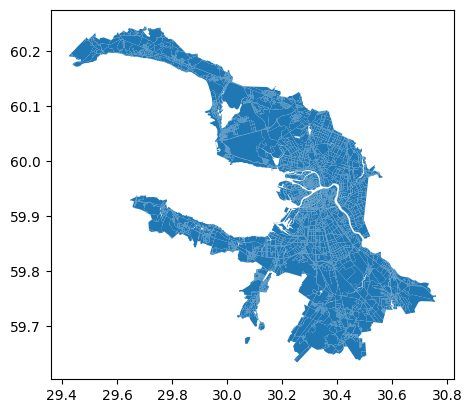

In [7]:
blocks_gdf.plot()